In [1]:
import numpy as np
import gdal
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#merged slope raster, accumulation area raster, and watershed raster into one three band raster.
# exported this raster into a text file from OSGeo4W command line:
# gdal2xyz input.tif -band 1 -band 2 -band 3 output.txt. This is a slow operation... 


In [2]:
ds = gdal.Open('..\..\GIS\LIDAR\merge3.tif')


In [3]:
band1 = ds.GetRasterBand(1)
band2 = ds.GetRasterBand(2)
band3 = ds.GetRasterBand(3)

In [4]:
array1 = band1.ReadAsArray().flatten()
array2 = band2.ReadAsArray().flatten()
array3 = band3.ReadAsArray().flatten()

In [5]:
elderSlope = array2[array3 == 1]
elderArea = array1[array3 == 1]
foxSlope = array2[array3 == 2]
foxArea = array1[array3 == 2]
hankSlope = array2[array3 == 3]
hankArea = array1[array3 == 3]
drySlope = array2[array3 == 4]
dryArea = array1[array3 == 4]

#Band 1 = area
#Band 2 = slope
# Band 3 = watershed

#watershed key:
#Dry = 4
#Hank = 3
#Elder = 1
#Fox = 2

In [6]:
elderArea = elderArea + 1 #can't take log of 0
foxArea = foxArea + 1
hankArea = hankArea + 1 
dryArea = dryArea + 1 


In [8]:
#GENERATE LOGARITHMIC BIN SPACING
numBins = 20

area_bins_elder = np.logspace(np.log10(min(elderArea)), np.log10(max(elderArea)), numBins)
area_bins_fox = np.logspace(np.log10(min(hankArea)), np.log10(max(hankArea)), numBins)
area_bins_hank = np.logspace(np.log10(min(hankArea)), np.log10(max(foxArea)), numBins)
area_bins_dry = np.logspace(np.log10(min(hankArea)), np.log10(max(dryArea)), numBins)

#area_bins_elder = np.logspace(np.log10(min(elderArea)), np.log10(1000), numBins)
#area_bins_fox = np.logspace(np.log10(min(foxArea)), np.log10(1000), numBins)
#area_bins_hank = np.logspace(np.log10(min(hankArea)), np.log10(1000), numBins)
#area_bins_dry = np.logspace(np.log10(min(hankArea)), np.log10(1000), numBins)

#Return the indices_elder of the bins to which each value in input array belongs.
indices_elder = np.digitize(elderArea, area_bins_elder)
indices_fox = np.digitize(foxArea, area_bins_fox)
indices_hank = np.digitize(hankArea, area_bins_hank)
indices_dry = np.digitize(dryArea, area_bins_dry)

#COMPUTE MEAN, MEDIAN AND STANDARD DEVIATION OF SLOPE IN EACH AREA BIN
bin_means_elder = [elderSlope[indices_elder == i].mean() for i in range(1, len(area_bins_elder))]
bin_medians_elder = [np.median(elderSlope[indices_elder == i]) for i in range(1, len(area_bins_elder))]
bin_stds_elder = [elderSlope[indices_elder == i].std() for i in range(1, len(area_bins_elder))]

bin_means_fox = [foxSlope[indices_fox == i].mean() for i in range(1, len(area_bins_fox))]
bin_medians_fox = [np.median(foxSlope[indices_fox == i]) for i in range(1, len(area_bins_fox))]
bin_stds_fox = [foxSlope[indices_fox == i].std() for i in range(1, len(area_bins_fox))]

bin_means_hank = [hankSlope[indices_hank == i].mean() for i in range(1, len(area_bins_hank))]
bin_medians_hank = [np.median(hankSlope[indices_hank == i]) for i in range(1, len(area_bins_hank))]
bin_stds_hank = [hankSlope[indices_hank == i].std() for i in range(1, len(area_bins_hank))]

bin_means_dry = [drySlope[indices_dry == i].mean() for i in range(1, len(area_bins_dry))]
bin_medians_dry = [np.median(drySlope[indices_dry == i]) for i in range(1, len(area_bins_dry))]
bin_stds_dry = [drySlope[indices_dry == i].std() for i in range(1, len(area_bins_dry))]



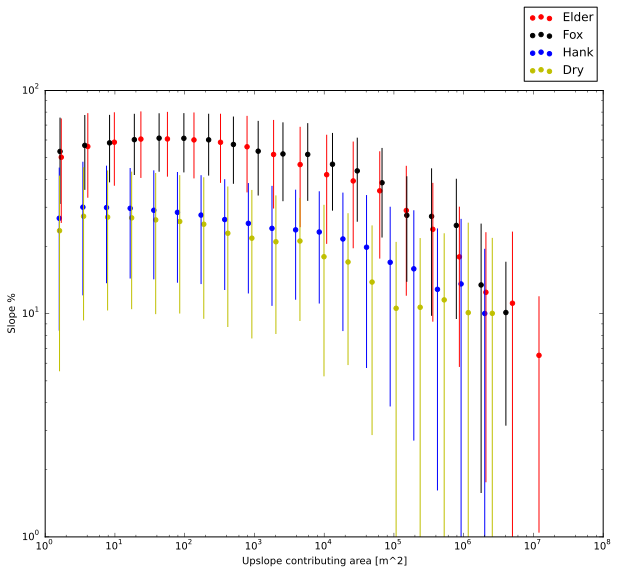

In [16]:
# Create a figure
plt.figure(figsize=(10,8))

plt.scatter(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_medians_elder, marker = "o", color = 'r', label="Elder")
plt.errorbar(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_medians_elder, yerr=bin_stds_elder, fmt = None, capthick=0, ecolor = 'r')

plt.scatter(.5*(area_bins_fox[1:]+area_bins_fox[:-1]),bin_medians_fox, marker = "o", color = 'k', label="Fox")
plt.errorbar(.5*(area_bins_fox[1:]+area_bins_fox[:-1]),bin_medians_fox, yerr=bin_stds_fox, fmt = None, capthick=0, ecolor = 'k')

plt.scatter(.5*(area_bins_hank[1:]+area_bins_hank[:-1]),bin_medians_hank, marker = "o", color = 'b', label="Hank")
plt.errorbar(.5*(area_bins_hank[1:]+area_bins_hank[:-1]),bin_medians_hank, yerr=bin_stds_hank, fmt = None, capthick=0, ecolor = 'b')

plt.scatter(.5*(area_bins_dry[1:]+area_bins_dry[:-1]),bin_medians_dry, marker = "o", color = 'y', label="Dry")
plt.errorbar(.5*(area_bins_dry[1:]+area_bins_dry[:-1]),bin_medians_dry, yerr=bin_stds_dry, fmt = None, capthick=0, ecolor = 'y')

plt.legend(bbox_to_anchor=(1, 1.2))

plt.ylabel("Slope %")
plt.xlabel("Upslope contributing area [m^2]")
plt.ylim([1,100])
plt.yscale('log')
plt.xscale('log')
plt.show()